<a href="https://colab.research.google.com/github/jonnie763/DATA-Science-601/blob/main/Data_Science_601_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science 601- Project #3: Questions and Hypothesis

Hypothesis 1: For pitchers and batters, do more strikeouts and walks correlate with more value? Are strikeouts/walks better for a pitchers/batters value? Use correlations with different types of visualizations to determine the answer. You will need 4 correlations. 

Question 1: Do  pitchers or batters (hitters) have more value on a per game basis? If so, predict pitcher and batter value over a 162 game season. 

Question 2: Can one categorize baseball players based off their strikeouts or strikeout production? Compare different types of baseball players ( "average" players etc and hall of famers) and use a "t-test" to see if hall of famers pitchers and batters strikeout or produce more or less strikeouts than average caliber players. You will need one t-test. 

## Background Infomation 



*   https://www.mlb.com/glossary/standard-stats/strikeout
*   https://www.mlb.com/glossary/standard-stats/walk
*   https://www.mlb.com/glossary/advanced-stats/wins-above-replacement

**The links are above will give you information on what a major league strikeout, walk, and "WAR" statistic is. Click the links to know more about each statistic. In short, a strikeout is an out where the ball registers in the strikezone three times. A walk is when a player gets a base when the pitcher records 4 balls outside the strikezone. The "WAR" statistic is a measurement of value of a baseball player, comparing him to the average replacement level player. 

*   Strikeouts are generally good for pitchers and bad for batters, as batters wish to get on base and produce runs and pitchers aim to get outs. Below we will view to what extent this is the case using correlations.  
*   Walks are generally good for batters and bad for pitchers as getting on base is good for batters and a measurement of control for pitchers. Below we will view to what extent this is the case using correlations.Pitchers who lack control tend to have higher walk rates. 
*   WAR is measurement of player value, we will see too what extend players value is tied to their strikeouts and walks, using correlations and Pearson's coefficient. 







## Importing modules and libraries 

In [7]:
import matplotlib.pyplot as plt          # There are alot of libraries and modules here, just in case 
import seaborn as sns
import seaborn as sn
import math
import pandas as pd                       #Import relevant libraries. Pandas for dataframes and ploty and matplotlib for visualization. Other libraries just in case.  
import plotly.express as px 
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
pd.set_option("max_rows", 5)              # Sometimes the print produces too many rows this is much cleaner 
plt.rcParams['figure.figsize'] = 10,10    #Increase general size for matplot.lib

## Hypothesis 1

For pitchers and batters, do more strikeouts and walks correlate with more value? Use correlations with different types of visualizations to determine the answer. You will need 4 correlations. 

### Batters Value versus Walk Rate 

In [71]:
Batters_df=pd.read_csv("FanGraphs Leaderboard.csv") # The main file we will use and manipulate for batters 
Batters_df

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,playerid
0,Babe Ruth,- - -,2503,10616,714,2174,2217,123.0,19.4%,12.5%,0.348,0.340,0.342,0.474,0.690,0.513,NaN,197,-23.4,1347.3,-18.6,168.4,1011327
1,Barry Bonds,- - -,2986,12606,762,2227,1996,514.0,20.3%,12.2%,0.309,0.285,0.298,0.444,0.607,0.435,NaN,173,30.4,1173.8,67.6,164.4,1109
2,Willie Mays,- - -,2992,12493,660,2062,1903,338.0,11.7%,12.2%,0.256,0.299,0.302,0.384,0.557,0.409,NaN,154,32.9,837.5,170.1,149.9,1008315
3,Ty Cobb,- - -,3035,13072,117,2246,1937,892.0,9.6%,4.1%,0.146,0.378,0.366,0.433,0.512,0.445,NaN,165,60.6,1036.0,-90.0,149.3,1002378
4,Honus Wagner,- - -,2792,11739,101,1736,1732,722.0,8.2%,7.6%,0.139,0.318,0.327,0.391,0.466,0.408,NaN,147,56.9,704.7,184.4,138.1,1013485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4068,Jim Levey,SLB,440,1751,11,162,140,23.0,4.9%,11.5%,0.075,0.256,0.230,0.272,0.305,0.268,NaN,45,-3.4,-132.7,-12.0,-8.2,1007567
4069,Doug Flynn,- - -,1309,4085,7,288,284,20.0,3.7%,7.8%,0.056,0.257,0.238,0.266,0.294,0.248,NaN,52,-3.6,-228.7,16.7,-8.4,1004182
4070,Ryan Doumit,- - -,980,3407,104,350,413,12.0,6.8%,18.2%,0.167,0.298,0.264,0.324,0.432,0.328,NaN,101,-20.1,-13.8,-178.1,-8.6,2113
4071,Gus Weyhing,- - -,552,1965,3,163,133,32.0,5.1%,26.5%,0.043,0.203,0.166,0.210,0.209,0.207,NaN,28,-6.5,-231.8,25.3,-10.2,1013820


In [9]:
cols = ['WAR', 'BB%']             # Select columns of a particular type, just need a correlation between the two 
WALKS_BATTERS = Batters_df[cols]
WALKS_BATTERS

,WAR,BB%
0,168.4,19.4%
1,164.4,20.3%
...,...,...
4071,-10.2,5.1%
4072,-16.2,2.7%


In [10]:
List_Percentages = [str(x).replace('%',' ') for x in WALKS_BATTERS["BB%"]]
# Create a list with the percents columns and remove the symbol, reinsert the list later. Need to remove percentages and change data structure later. 
List_Percentages[:10]

['19.4 ',
 '20.3 ',
 '11.7 ',
 '9.6 ',
 '8.2 ',
 '10.1 ',
 '11.5 ',
 '20.6 ',
 '11.0 ',
 '12.6 ']

In [11]:
WALKS_BATTERS['Walk Rate']= List_Percentages

List_Percentages[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['19.4 ',
 '20.3 ',
 '11.7 ',
 '9.6 ',
 '8.2 ',
 '10.1 ',
 '11.5 ',
 '20.6 ',
 '11.0 ',
 '12.6 ']

In [12]:
WALK_BATTERS_2=WALKS_BATTERS.drop(columns=["BB%"]) # Cleansed data frame
WALK_BATTERS_2

,WAR,Walk Rate
0,168.4,19.4
1,164.4,20.3
...,...,...
4071,-10.2,5.1
4072,-16.2,2.7


In [13]:
WALK_BATTERS_3=WALK_BATTERS_2.astype(float) # Change the data struture to make the correlation 

In [14]:
WALK_BATTERS_3.corr(method ='pearson') # Relatively moderate correlation 

,WAR,Walk Rate
WAR,1.00000,0.38246
Walk Rate,0.38246,1.00000


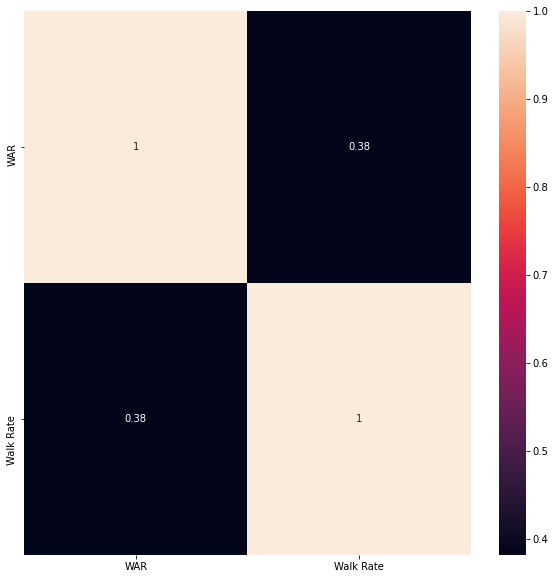

In [15]:
corrMatrix = WALK_BATTERS_3.corr() # Correlation visual, moderate correlation 

sn.heatmap(corrMatrix, annot=True)

plt.show()


### Batters value versus Strikeouts 

In [16]:
Batters_df_2=pd.read_csv("FanGraphs Leaderboard.csv") # Now measure strikouts vs value 
Batters_df_2
# https://catalog.data.gov/group/older-adults-health-data?page=7

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,playerid
0,Babe Ruth,- - -,2503,10616,714,2174,2217,123.0,19.4%,12.5%,0.348,0.340,0.342,0.474,0.690,0.513,NaN,197,-23.4,1347.3,-18.6,168.4,1011327
1,Barry Bonds,- - -,2986,12606,762,2227,1996,514.0,20.3%,12.2%,0.309,0.285,0.298,0.444,0.607,0.435,NaN,173,30.4,1173.8,67.6,164.4,1109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,Gus Weyhing,- - -,552,1965,3,163,133,32.0,5.1%,26.5%,0.043,0.203,0.166,0.210,0.209,0.207,NaN,28,-6.5,-231.8,25.3,-10.2,1013820
4072,Bill Bergen,- - -,947,3228,2,138,193,23.0,2.7%,15.5%,0.031,0.177,0.170,0.194,0.201,0.192,NaN,22,-9.1,-296.3,44.0,-16.2,1000867


In [17]:
cols = ['WAR', 'K%']          # We will go through the same process again expect now, we will clean the strikeout column 
K_BATTERS = Batters_df[cols]
K_BATTERS

,WAR,K%
0,168.4,12.5%
1,164.4,12.2%
...,...,...
4071,-10.2,26.5%
4072,-16.2,15.5%


In [18]:
List_Percentages = [str(x).replace('%',' ') for x in K_BATTERS["K%"]]
# Create a list with the percents columns and remove the symbol, reinsert the list later. 
List_Percentages[:10]

['12.5 ',
 '12.2 ',
 '12.2 ',
 '4.1 ',
 '7.6 ',
 '9.9 ',
 '2.3 ',
 '7.2 ',
 '7.2 ',
 '5.5 ']

In [19]:
K_BATTERS['Strike Rate']= List_Percentages

List_Percentages[:10]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['12.5 ',
 '12.2 ',
 '12.2 ',
 '4.1 ',
 '7.6 ',
 '9.9 ',
 '2.3 ',
 '7.2 ',
 '7.2 ',
 '5.5 ']

In [20]:
K_BATTERS_2=K_BATTERS.drop(columns=["K%"])
K_BATTERS_2

,WAR,Strike Rate
0,168.4,12.5
1,164.4,12.2
...,...,...
4071,-10.2,26.5
4072,-16.2,15.5


In [21]:
K_BATTERS_3=K_BATTERS_2.astype(float)

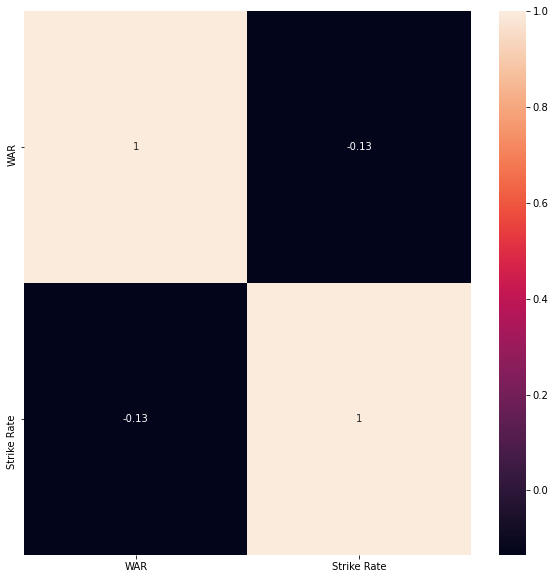

In [22]:
corrMatrix = K_BATTERS_3.corr() # This correlation is much weaker, but negative as expected 

sn.heatmap(corrMatrix, annot=True)

plt.show()

### Pitchers Value versus Strikeouts 




In [23]:
K_df=pd.read_csv("FanGraphs Leaderboard (1).csv") # The main file we will use and manipulate for pitchers, no need to cleanse columns here fortunately  
K_df

,Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR,playerid
0,Roger Clemens,- - -,354,184,0,709,707,4916.2,8.55,2.89,0.66,0.284,74.6%,46.8%,8.9%,91.4,3.12,NaN,3.09,3.50,133.7,815
1,Cy Young,- - -,511,316,17,906,815,7354.2,3.43,1.49,0.17,0.279,64.1%,NaN,NaN,NaN,2.63,NaN,2.82,NaN,131.5,1014369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,Pat Mahomes,- - -,42,39,5,308,63,709.0,5.74,4.98,1.47,0.284,69.5%,38.6%,6.8%,NaN,5.47,NaN,5.62,5.19,-3.0,291
3159,Alan Mills,- - -,39,32,15,474,5,636.0,6.45,5.59,1.17,0.265,78.4%,NaN,NaN,NaN,4.12,NaN,5.25,NaN,-3.6,1008949


In [24]:
cols = ['WAR', 'K/9']
K_RATE__BATTERS = K_df[cols]
K_RATE__BATTERS

,WAR,K/9
0,133.7,8.55
1,131.5,3.43
...,...,...
3158,-3.0,5.74
3159,-3.6,6.45


In [25]:
K_RATE__BATTERS.corr(method ='pearson')

,WAR,K/9
WAR,1.000000,0.044549
K/9,0.044549,1.000000


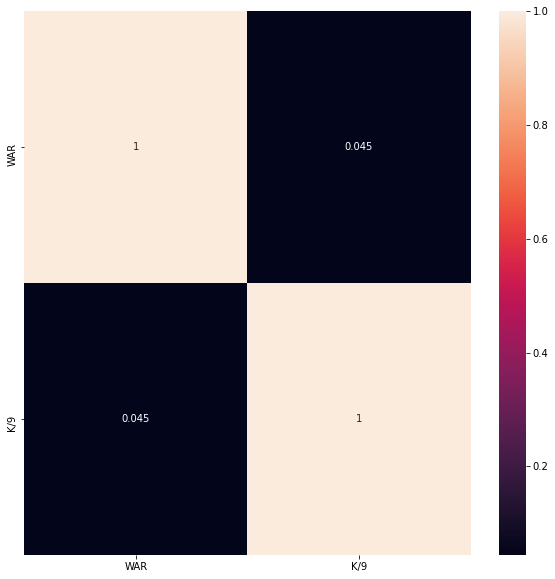

In [26]:
corrMatrix = K_RATE__BATTERS.corr() # Almost no correlation 

sn.heatmap(corrMatrix, annot=True)

plt.show()

### Pitchers Value versus Walk Rate

In [27]:
K_df_2=pd.read_csv("FanGraphs Leaderboard (1).csv") # The main file we will use and manipulate for pitachers and Walks 
K_df_2

,Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR,playerid
0,Roger Clemens,- - -,354,184,0,709,707,4916.2,8.55,2.89,0.66,0.284,74.6%,46.8%,8.9%,91.4,3.12,NaN,3.09,3.50,133.7,815
1,Cy Young,- - -,511,316,17,906,815,7354.2,3.43,1.49,0.17,0.279,64.1%,NaN,NaN,NaN,2.63,NaN,2.82,NaN,131.5,1014369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,Pat Mahomes,- - -,42,39,5,308,63,709.0,5.74,4.98,1.47,0.284,69.5%,38.6%,6.8%,NaN,5.47,NaN,5.62,5.19,-3.0,291
3159,Alan Mills,- - -,39,32,15,474,5,636.0,6.45,5.59,1.17,0.265,78.4%,NaN,NaN,NaN,4.12,NaN,5.25,NaN,-3.6,1008949


In [28]:
cols = ['WAR', 'BB/9']
B_RATE__BATTERS = K_df_2[cols]
B_RATE__BATTERS

,WAR,BB/9
0,133.7,2.89
1,131.5,1.49
...,...,...
3158,-3.0,4.98
3159,-3.6,5.59


In [29]:
B_RATE__BATTERS.corr(method ='pearson')

,WAR,BB/9
WAR,1.000000,-0.359689
BB/9,-0.359689,1.000000


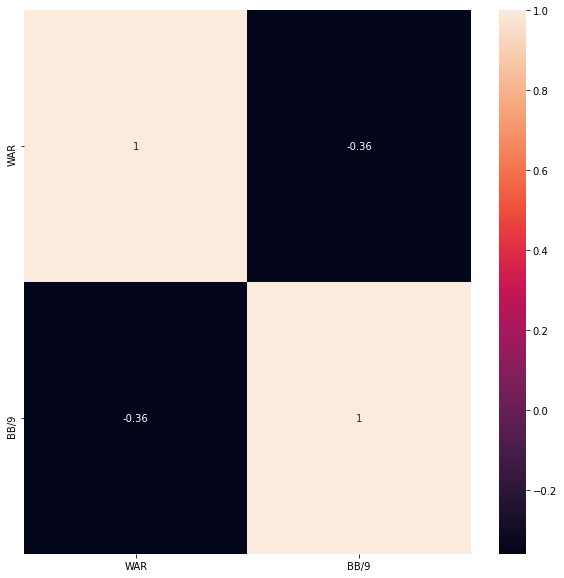

In [30]:
corrMatrix = B_RATE__BATTERS.corr() # Moderate correlation as walks go up, sometimes value goes down 

sn.heatmap(corrMatrix, annot=True)

plt.show()

## Question 1 Value per 162 games 

 Do  pitchers or batters (hitters) have more value on a per game basis? If so, predict pitcher and batter value over a 162 game season. 

In [72]:
K_df_2=pd.read_csv("FanGraphs Leaderboard (1).csv") # The main file we will use and manipulate and used before 
K_df_2

,Name,Team,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,vFA (pi),ERA,xERA,FIP,xFIP,WAR,playerid
0,Roger Clemens,- - -,354,184,0,709,707,4916.2,8.55,2.89,0.66,0.284,74.6%,46.8%,8.9%,91.4,3.12,NaN,3.09,3.50,133.7,815
1,Cy Young,- - -,511,316,17,906,815,7354.2,3.43,1.49,0.17,0.279,64.1%,NaN,NaN,NaN,2.63,NaN,2.82,NaN,131.5,1014369
2,Walter Johnson,WAS,417,279,34,802,666,5914.2,5.34,2.07,0.15,0.264,72.2%,NaN,NaN,NaN,2.17,NaN,2.36,NaN,117.1,1006511
3,Greg Maddux,- - -,355,227,0,744,740,5008.1,6.06,1.80,0.63,0.281,72.3%,51.5%,12.0%,81.0,3.16,NaN,3.26,3.73,116.7,104
4,Randy Johnson,- - -,303,166,2,618,603,4135.1,10.61,3.26,0.89,0.291,74.7%,43.2%,12.0%,91.2,3.29,NaN,3.19,3.23,110.4,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3155,Lowell Palmer,- - -,5,18,0,106,25,316.2,6.79,5.74,1.17,0.279,70.5%,NaN,NaN,NaN,5.29,NaN,4.86,NaN,-2.3,1009974
3156,Ken Patterson,- - -,14,8,5,224,4,317.2,5.18,4.70,1.08,0.257,75.8%,NaN,NaN,NaN,3.88,NaN,4.86,NaN,-2.5,1010067
3157,Larry Bearnarth,- - -,13,21,8,173,7,322.2,3.46,3.77,0.86,0.283,70.1%,NaN,NaN,NaN,4.13,NaN,4.38,NaN,-2.6,1000723
3158,Pat Mahomes,- - -,42,39,5,308,63,709.0,5.74,4.98,1.47,0.284,69.5%,38.6%,6.8%,NaN,5.47,NaN,5.62,5.19,-3.0,291


In [32]:
cols = ['WAR', 'G']
PITCHERS_DF = K_df_2[cols]
PITCHERS_DF

,WAR,G
0,133.7,709
1,131.5,906
...,...,...
3158,-3.0,308
3159,-3.6,474


In [33]:
PITCHERS_DF.sum()

WAR     38127.0
G      914778.0
dtype: float64

In [34]:
Per_game_value= 38185.7/916113.0 
Per_game_value*162

6.752533148203332

In [35]:
DF=pd.read_csv("FanGraphs Leaderboard.csv") # The main file we will use and manipulate 
DF
# https://catalog.data.gov/group/older-adults-health-data?page=7

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,playerid
0,Babe Ruth,- - -,2503,10616,714,2174,2217,123.0,19.4%,12.5%,0.348,0.340,0.342,0.474,0.690,0.513,NaN,197,-23.4,1347.3,-18.6,168.4,1011327
1,Barry Bonds,- - -,2986,12606,762,2227,1996,514.0,20.3%,12.2%,0.309,0.285,0.298,0.444,0.607,0.435,NaN,173,30.4,1173.8,67.6,164.4,1109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,Gus Weyhing,- - -,552,1965,3,163,133,32.0,5.1%,26.5%,0.043,0.203,0.166,0.210,0.209,0.207,NaN,28,-6.5,-231.8,25.3,-10.2,1013820
4072,Bill Bergen,- - -,947,3228,2,138,193,23.0,2.7%,15.5%,0.031,0.177,0.170,0.194,0.201,0.192,NaN,22,-9.1,-296.3,44.0,-16.2,1000867


In [36]:
cols = ['WAR', 'G']
DF = DF[cols]
DF

,WAR,G
0,168.4,2503
1,164.4,2986
...,...,...
4071,-10.2,552
4072,-16.2,947


In [37]:
DF.sum()

WAR      53536.1
G      3957398.0
dtype: float64

In [38]:
Per_game_value= 53621.2/3963917.0
Per_game_value*162

2.19142691433751

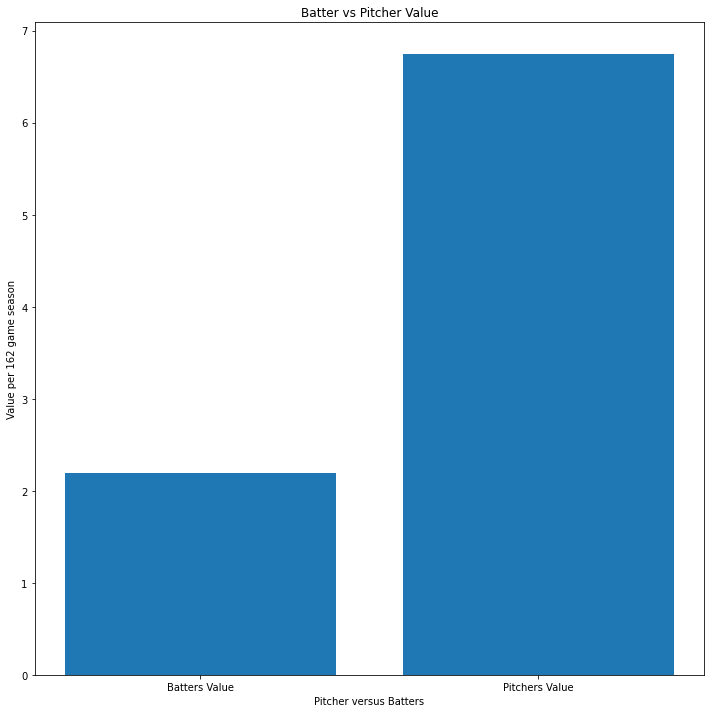

In [39]:
Poverty_Rate  = [2.19142691433751,6.752533148203332]                       #https://www.worldbank.org/en/topic/poverty/overview#:~:text=The%20global%20extreme%20poverty%20rate,%245.50%20a%20day%20in%202017
Country = ["Batters Value",	"Pitchers Value"]  # Made my own dataframe, only needed two data points, no need for web scarping and csv, data is based off above link  
Poverty_Rate

fig, ax = plt.subplots(figsize=(12,12))

ax.bar(Country, Poverty_Rate)
ax.set_title("Batter vs Pitcher Value")
ax.set_xlabel("Pitcher versus Batters")
ax.set_ylabel("Value per 162 game season")

fig.show()

### Pitchers are more valuable than batters per game  




## Question 2 T-Test

 Can one categorize baseball players based off their strikeouts or strikeout production? Compare different types of baseball players ( "average" players etc and hall of famers) and use a "t-test" to see if hall of famers pitchers and batters strikeout or produce more strikeouts than average caliber players. You will need two t-tests. 

In [40]:
Batters_df=pd.read_csv("FanGraphs Leaderboard.csv") # The main file for batters
Batters_df

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,playerid
0,Babe Ruth,- - -,2503,10616,714,2174,2217,123.0,19.4%,12.5%,0.348,0.340,0.342,0.474,0.690,0.513,NaN,197,-23.4,1347.3,-18.6,168.4,1011327
1,Barry Bonds,- - -,2986,12606,762,2227,1996,514.0,20.3%,12.2%,0.309,0.285,0.298,0.444,0.607,0.435,NaN,173,30.4,1173.8,67.6,164.4,1109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,Gus Weyhing,- - -,552,1965,3,163,133,32.0,5.1%,26.5%,0.043,0.203,0.166,0.210,0.209,0.207,NaN,28,-6.5,-231.8,25.3,-10.2,1013820
4072,Bill Bergen,- - -,947,3228,2,138,193,23.0,2.7%,15.5%,0.031,0.177,0.170,0.194,0.201,0.192,NaN,22,-9.1,-296.3,44.0,-16.2,1000867


In [41]:
DF=pd.read_csv("FanGraphs Leaderboard (3).csv") # Hall of fame baseball players 
DF

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,playerid
0,Babe Ruth,- - -,2503,10616,714,2174,2217,123,19.4%,12.5%,0.348,0.340,0.342,0.474,0.690,0.513,NaN,197,-23.4,1347.3,-18.6,168.4,1011327
1,Willie Mays,- - -,2992,12493,660,2062,1903,338,11.7%,12.2%,0.256,0.299,0.302,0.384,0.557,0.409,NaN,154,32.9,837.5,170.1,149.9,1008315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,Vic Willis,- - -,531,1623,1,107,84,3,5.0%,11.1%,0.020,0.190,0.166,0.213,0.186,0.200,NaN,23,-7.3,-156.8,56.3,-4.7,1014042
229,Stan Coveleski,- - -,451,1187,1,70,81,0,4.5%,25.8%,0.046,0.223,0.159,0.202,0.205,0.199,NaN,7,-0.8,-141.7,54.5,-4.8,1002682


###Null Hypothesis: Hall of Fame Baseball players strikeout as much the average MLB player 



###Altenate Hypothesis: Hall of Fame Baseball players strikeout less than the average MLB player 

In [44]:
B_df=pd.read_csv("FanGraphs Leaderboard.csv") # Large sample of baseball players  
B_df

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,playerid
0,Babe Ruth,- - -,2503,10616,714,2174,2217,123.0,19.4%,12.5%,0.348,0.340,0.342,0.474,0.690,0.513,NaN,197,-23.4,1347.3,-18.6,168.4,1011327
1,Barry Bonds,- - -,2986,12606,762,2227,1996,514.0,20.3%,12.2%,0.309,0.285,0.298,0.444,0.607,0.435,NaN,173,30.4,1173.8,67.6,164.4,1109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,Gus Weyhing,- - -,552,1965,3,163,133,32.0,5.1%,26.5%,0.043,0.203,0.166,0.210,0.209,0.207,NaN,28,-6.5,-231.8,25.3,-10.2,1013820
4072,Bill Bergen,- - -,947,3228,2,138,193,23.0,2.7%,15.5%,0.031,0.177,0.170,0.194,0.201,0.192,NaN,22,-9.1,-296.3,44.0,-16.2,1000867


In [46]:
K_BATTERS_2
Sample_size= 4073
K_BATTERS_2.astype(float)

,WAR,Strike Rate
0,168.4,12.5
1,164.4,12.2
...,...,...
4071,-10.2,26.5
4072,-16.2,15.5


In [50]:
K_BATTERS_2.mean()

WAR            13.144144
Strike Rate    13.091247
dtype: float64

In [51]:
K_BATTERS_2['Strike Rate'] = K_BATTERS_2['Strike Rate'].astype(float)

In [52]:
K_BATTERS_2
Sample_size= 4073
K_BATTERS_2.astype(float)
K_BATTERS_2.mean()
sample_mean=13.091247

In [53]:
pd.set_option("max_rows", 10)  
K_BATTERS_2.describe()

,WAR,Strike Rate
count,4073.000000,3953.000000
mean,13.144144,13.091247
std,17.883704,6.509516
min,-16.200000,0.000000
25%,2.000000,8.000000
50%,6.800000,12.300000
75%,18.000000,17.200000
max,168.400000,50.000000


In [56]:
STD=6.509516

In [57]:
std_err =(STD / math.sqrt(4073)) # Calculate and display the sample standard error, essentially we need these "pieces" to get a t-score
print("Sample Standard Error is", std_err)

Sample Standard Error is 0.10199796187391012


In [58]:
t_value = round(stats.t.ppf(0.975, 4073),2)
print("t critical value = ", t_value)

t critical value =  1.96


In [59]:
margin_of_error = (t_value * std_err)
print("Margin of Error =", margin_of_error)

Margin of Error = 0.19991600527286385


In [60]:
lower_limit = sample_mean - margin_of_error
print ("Lower Limit = ", lower_limit)

Lower Limit =  12.891330994727136


In [61]:
upper_limit = sample_mean + margin_of_error
print ("Upper Limit = ", upper_limit)

Upper Limit =  13.291163005272862


In [62]:
# Print the 95% confidence interveral in the form (lower limit, upper limit)

print("The 95% Confidence Interval = (", lower_limit, ",", upper_limit, ")") # Now print both above to get your confidence interval

The 95% Confidence Interval = ( 12.891330994727136 , 13.291163005272862 )


In [73]:
B_df_2=pd.read_csv("FanGraphs Leaderboard (3).csv") # The main file we will use and manipulate 
B_df_2

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,playerid
0,Babe Ruth,- - -,2503,10616,714,2174,2217,123,19.4%,12.5%,0.348,0.340,0.342,0.474,0.690,0.513,NaN,197,-23.4,1347.3,-18.6,168.4,1011327
1,Willie Mays,- - -,2992,12493,660,2062,1903,338,11.7%,12.2%,0.256,0.299,0.302,0.384,0.557,0.409,NaN,154,32.9,837.5,170.1,149.9,1008315
2,Ty Cobb,- - -,3035,13072,117,2246,1937,892,9.6%,4.1%,0.146,0.378,0.366,0.433,0.512,0.445,NaN,165,60.6,1036.0,-90.0,149.3,1002378
3,Honus Wagner,- - -,2792,11739,101,1736,1732,722,8.2%,7.6%,0.139,0.318,0.327,0.391,0.466,0.408,NaN,147,56.9,704.7,184.4,138.1,1013485
4,Hank Aaron,- - -,3298,13940,755,2174,2297,240,10.1%,9.9%,0.250,0.291,0.305,0.374,0.555,0.403,NaN,153,24.9,882.0,-61.2,136.3,1000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Lefty Gomez,- - -,368,1024,0,59,58,1,4.9%,24.6%,0.012,0.204,0.147,0.194,0.159,0.174,NaN,-2,-0.5,-146.6,69.0,-3.9,1004821
226,Lefty Grove,- - -,619,1579,15,119,121,1,6.6%,37.6%,0.060,0.246,0.148,0.209,0.207,0.202,NaN,6,-0.5,-206.3,103.6,-4.4,1005099
227,Pud Galvin,- - -,731,2788,5,278,220,23,1.4%,24.7%,0.060,0.263,0.201,0.212,0.261,0.217,NaN,57,-2.7,-181.7,25.7,-4.5,1004469
228,Vic Willis,- - -,531,1623,1,107,84,3,5.0%,11.1%,0.020,0.190,0.166,0.213,0.186,0.200,NaN,23,-7.3,-156.8,56.3,-4.7,1014042


In [64]:
cols = ['WAR', 'K%']
WALKS_BATTERS = B_df_2[cols]
WALKS_BATTERS

,WAR,K%
0,168.4,12.5%
1,149.9,12.2%
2,149.3,4.1%
3,138.1,7.6%
4,136.3,9.9%
...,...,...
225,-3.9,24.6%
226,-4.4,37.6%
227,-4.5,24.7%
228,-4.7,11.1%


In [65]:
List_Percentages = [str(x).replace('%',' ') for x in WALKS_BATTERS["K%"]]
# Create a list with the percents columns and remove the symbol, reinsert the list later. 
List_Percentages[:10]

['12.5 ',
 '12.2 ',
 '4.1 ',
 '7.6 ',
 '9.9 ',
 '2.3 ',
 '7.2 ',
 '7.2 ',
 '5.5 ',
 '3.2 ']

In [66]:
WALKS_BATTERS['Strike Rate']= List_Percentages

List_Percentages[:10]

WALK_BATTERS_2=WALKS_BATTERS.drop(columns=["K%"])
WALK_BATTERS_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,WAR,Strike Rate
0,168.4,12.5
1,149.9,12.2
2,149.3,4.1
3,138.1,7.6
4,136.3,9.9
...,...,...
225,-3.9,24.6
226,-4.4,37.6
227,-4.5,24.7
228,-4.7,11.1


In [67]:
WALK_BATTERS_2['Strike Rate'] = WALK_BATTERS_2['Strike Rate'].astype(float)
WALK_BATTERS_2.mean()

WAR            45.763043
Strike Rate    12.587556
dtype: float64

In [ ]:
HALL_of_Famers=12.587556 # This is lower than the lower limit of the confidence interval therefore, our alternate is true 

In [82]:
# Print the 95% confidence interveral in the form (lower limit, upper limit)

print("The 95% Confidence Interval = (", lower_limit, ",", upper_limit, ")") # Now print both above to get your confidence interval


print("The Hall of Fame Mean is  12.587556, less than the lower limit of ", lower_limit, )

The 95% Confidence Interval = ( 12.891330994727136 , 13.291163005272862 )
The Hall of Fame Mean is  12.587556, less than the lower limit of  12.891330994727136


### Alternate Hypothesis is true, Hall of Famer Batters stuck out less than the average MLB player. 

## Conclusion and analysis 

Hypothesis 1 analysis : The correlation between walks and value are often much stronger than the correlation between strikeouts and value. One issue I came across is that, perhaps for the future, I can include value per game as opposed per game instead of total value throughout a career, as it is a correlation that is probably more accurate. 

Question 1 analysis: This one seemed obvious, pitchers are more valueable per game, but don't play every day whereas batters play everyday so this can be misleading. 

Question 2 analysis: This one is interesting, after finding out the confidence levels, ( which has a low range due to the size of the sample) a sample of hall of fame players do strikeout less than the average mlb player. So hall of fame batters do often strikeout less than there a large sample of baseball players. 

Questions/analysis and different approaches for subsequent study: 

As stated before,  I can include value per game as opposed per game instead of total value throughout a career, as it is a correlation that is probably more accurate. This is something that will be probably increase the correlations throughout. 

Lets keep in mind the other things that determine player value for reference. 

*   Batter value can be determined be player defensive rating, especially in positions that value defense more highly (shortstop and center fielder)  
*   Batter value can be determined be player slugging percentage where homeruns can be the main driver of slugging percentage. 
*   Baserunning can also affect batter value 
*   Since the project did not look at per game value and looked at total value instead longevity can affect the correlations reliability 
*   Pitcher value is mostly determined by three things; walk rate, strikeouts, and homeruns given per game ( per nine innings to be exact) 

**Conclusion: Walks and strikeouts are just one of many ways to determine player value but walks are a better predictor of player value than strikeouts.** 



